In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [45]:
excel_file = pd.read_excel(r"C:\Users\UltraBook 3.1\Desktop\data_analysis projects\Olame_projects\Machine_learning_clustering\online_retail_II.xlsx")

In [3]:
# !pip install pandas openpyxl
excel_file.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [4]:
excel_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
# - only customer Id has missing values, check statistics to see which one fits
# - chaneg the customer Id datatype to int, and find a way to impute data into the missing values of customer Id
#  107927 missing customer ID that is 25% of the data.


In [6]:
excel_file.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,525461.0,10.337667,-9600.0,1.0,3.0,10.0,19152.0,107.42411
InvoiceDate,525461,2010-06-28 11:37:36.845017856,2009-12-01 07:45:00,2010-03-21 12:20:00,2010-07-06 09:51:00,2010-10-15 12:45:00,2010-12-09 20:01:00,NaN
Price,525461.0,4.688834,-53594.36,1.25,2.1,4.21,25111.09,146.126914
Customer ID,417534.0,15360.645478,12346.0,13983.0,15311.0,16799.0,18287.0,1680.811316


In [7]:
excel_file = excel_file.dropna(subset=['Customer ID'])

In [8]:
# dropped the rows with missing customer id
excel_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      417534 non-null  object        
 1   StockCode    417534 non-null  object        
 2   Description  417534 non-null  object        
 3   Quantity     417534 non-null  int64         
 4   InvoiceDate  417534 non-null  datetime64[ns]
 5   Price        417534 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      417534 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.7+ MB


In [9]:
# basic selection of relevant features for the clustering task usig dbscan
# - monetary = Total sales which Quantity * Price
# - Frequency = how often do they buy
# - Recency = when was the last tie they bought from the retail shop

In [10]:
excel_file['total_sales'] = excel_file['Quantity'] * excel_file['Price']

In [11]:
excel_file

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [12]:
#  groupby monetary
monetary = excel_file.groupby('Customer ID')['total_sales'].sum()
monetary_df = pd.DataFrame(monetary)

In [13]:
# monetary.columns = [['Customer ID', 'total_sales']]
monetary_df.rename(columns={'total_sales':'Monetary'}, inplace=True)

In [14]:
# drop rows with negative total sales
monetary_df = monetary_df.drop(index=monetary_df[monetary_df['Monetary'] < 0].index)

In [15]:
monetary_df

,Monetary
Customer ID,
12347.0,1323.32
12348.0,222.16
12349.0,2646.99
12351.0,300.93
12352.0,343.80
...,...
18283.0,641.77
18284.0,436.68
18285.0,427.00


In [16]:
max_date = excel_file.groupby('Customer ID')['InvoiceDate'].max()
max_date

Customer ID
12346.0   2010-10-04 16:33:00
12347.0   2010-12-07 14:57:00
12348.0   2010-09-27 14:59:00
12349.0   2010-10-28 08:23:00
12351.0   2010-11-29 15:23:00
                  ...        
18283.0   2010-11-22 15:30:00
18284.0   2010-10-06 12:31:00
18285.0   2010-02-17 10:24:00
18286.0   2010-08-20 11:57:00
18287.0   2010-11-22 11:51:00
Name: InvoiceDate, Length: 4383, dtype: datetime64[ns]

In [17]:
# comparing using the last day of the year of 2010
last_date_2010 = pd.Timestamp('2010-12-31')

In [18]:
recency_df = pd.DataFrame(max_date)

In [19]:
recency_df['split_result']  = last_date_2010 - recency_df.InvoiceDate

In [20]:
recency_df['split_result'] = recency_df['split_result'].astype(str)
recency_df['split_result'] = recency_df['split_result'].str.split(' days ', expand=True)[0]

In [21]:
recency_df.drop(columns=['InvoiceDate'], inplace=True)

In [30]:
recency_df
recency_df.rename(columns={'split_result':'Recency'}, inplace=True)

In [23]:
counts = excel_file['Customer ID'].value_counts()

In [24]:
freq = excel_file.groupby('Customer ID')['InvoiceDate'].count()
frequency_df = pd.DataFrame(freq)

In [25]:
frequency_df
frequency_df.rename(columns={'InvoiceDate':'Frequency'}, inplace=True)

In [26]:
#  merge the three dataframes RFM

In [31]:
Final_df = pd.merge(monetary_df, recency_df, on='Customer ID')
Final_df = Final_df.merge(frequency_df, on='Customer ID')

In [39]:
Final_df.Recency = Final_df.Recency.astype(int)
Final_df.Frequency = Final_df.Frequency.astype(int)

In [40]:
Final_df['m_score'] = pd.qcut(Final_df['Monetary'], q=5, labels=[5,4,3,2,1])
Final_df['r_score'] = pd.qcut(Final_df['Recency'], q=5, labels=[1,2,3,4,5])
Final_df['f_score'] = pd.qcut(Final_df['Frequency'], q=5, labels=[1,2,3,4,5])
Final_df['rfm_score_sum'] = Final_df['m_score'].astype(int) + Final_df['r_score'].astype(int) + Final_df['f_score'].astype(int)

In [50]:
Final_df

,Monetary,Recency,Frequency,m_score,r_score,f_score,rfm_score_sum
Customer ID,,,,,,,
12347.0,1323.32,23,71,2,1,4,7
12348.0,222.16,94,20,5,4,2,11
12349.0,2646.99,63,107,1,3,4,8
12351.0,300.93,31,21,4,1,2,7
12352.0,343.80,31,18,4,1,2,7
...,...,...,...,...,...,...,...
18283.0,641.77,38,230,3,2,5,10
18284.0,436.68,85,29,4,3,2,9
18285.0,427.00,316,12,4,5,1,10


In [47]:
cm= Final_df.corr()

<Axes: >

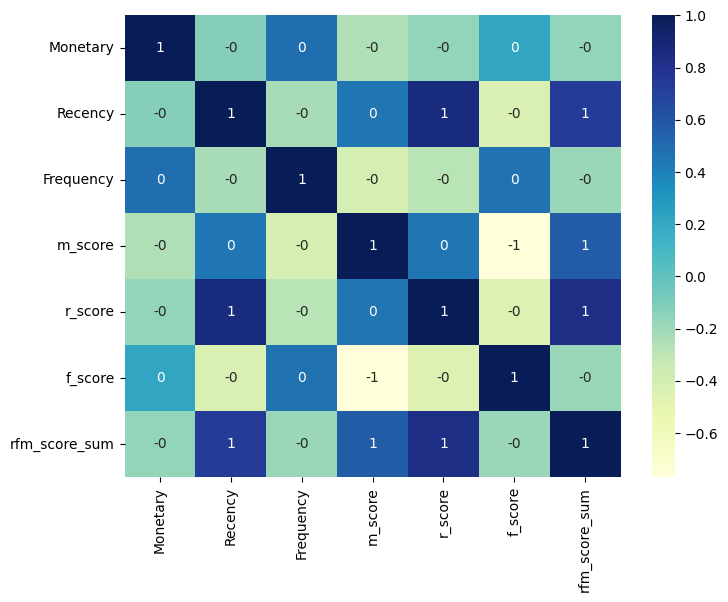

In [48]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="YlGnBu")

In [52]:
Final_df.

,Monetary,Recency,Frequency,m_score,r_score,f_score,rfm_score_sum
Customer ID,,,,,,,
12347.0,1323.32,23,71,2,1,4,7
12348.0,222.16,94,20,5,4,2,11
12349.0,2646.99,63,107,1,3,4,8
12351.0,300.93,31,21,4,1,2,7
12352.0,343.80,31,18,4,1,2,7
...,...,...,...,...,...,...,...
18283.0,641.77,38,230,3,2,5,10
18284.0,436.68,85,29,4,3,2,9
18285.0,427.00,316,12,4,5,1,10


In [58]:
X = Final_df[['Monetary', 'Recency','Frequency','m_score','r_score','f_score']]	

In [61]:
scaler = StandardScaler()
X_values = scaler.fit_transform(X)
X_values

array([[-0.07493639, -0.89404836, -0.12635035, -0.70702444, -1.40544698,
         0.715277  ],
       [-0.20320021, -0.15340297, -0.37321385,  1.41404888,  0.71184763,
        -0.69555882],
       [ 0.07924552, -0.47678335,  0.04790624, -1.41404888,  0.00608276,
         0.715277  ],
       ...,
       [-0.17934031,  2.16241784, -0.41193753,  0.70702444,  1.41761251,
        -1.40097673],
       [-0.09064847,  0.24299879, -0.13119081, -0.70702444,  0.71184763,
         0.715277  ],
       [ 0.04355819, -0.73757398, -0.05374343, -1.41404888, -0.69968211,
         0.715277  ]])

In [62]:
# Dendrogram
Z = linkage(X_values, method='ward')

# Agglomerative Clustering
# model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
# labels = model.fit_predict(X_scaled)


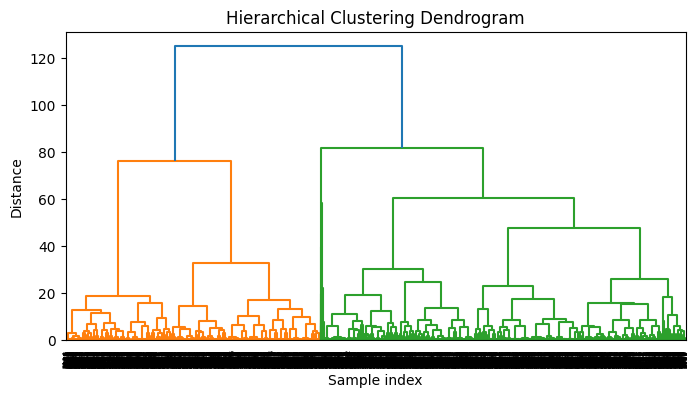

In [63]:
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [68]:
# Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = model.fit_predict(X_values)
X['labels'] = labels

In [75]:
X[X.labels == 0]

,Monetary,Recency,Frequency,m_score,r_score,f_score,labels
Customer ID,,,,,,,
12347.0,1323.32,23,71,2,1,4,0
12349.0,2646.99,63,107,1,3,4,0
12356.0,3562.25,36,84,1,2,4,0
12357.0,12079.99,44,165,1,2,5,0
12358.0,2719.01,31,58,1,1,3,0
...,...,...,...,...,...,...,...
18276.0,1297.31,41,83,2,2,4,0
18277.0,1013.75,44,59,2,2,3,0
18283.0,641.77,38,230,3,2,5,0
